## Overfitting - Bias and Variance: Introduction
-Contents
-Notes
-Source: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/


In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
from fn_helpers import fn_print_coefficients, fn_plot_predictions

***Create some data***
- simulate random values for x in interval [0,1]
- compute y based on a sine function
- add gaussian noise to y

In [3]:
# #Define input array with angles from 60deg to 300deg converted to radians
# x = np.array([i*np.pi/180 for i in range(60,300,4)])
# np.random.seed(2018) #setting seed for reproducibility
# gaussian_noise = np.random.normal(0,0.15,len(x))
# y = np.sin(x)+gaussian_noise
# data = pd.DataFrame(np.column_stack([x,y]), columns =
#                    ['x','y'])
# plt.plot(data['x'],data['y'],'.')

In [4]:
np.random.seed(2018)
n = 3030
x = np.random.uniform(0,1,n) #uniform random sample of size n
y = np.sin(5*x) # y = sin(5x)
e = np.random.normal(0,1/3,n) #noise (gaussian) with mean 0 and variance 1/3
y += e # y = sin(5x) + noise (white noise error term)

df_all = pd.DataFrame({'y': y,
                      'x_1': x})

#split the data into train and test sets
df_train = df_all.iloc[0:30]
df_test = df_all.iloc[30:3030]

***Plot the data***


In [5]:
def fn_plot_data(data):
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(data['x_1'],data['y'],'k.')
    ax1.set_xlabel('x_1',fontsize=20)
    ax1.set_ylabel('y',fontsize=20)

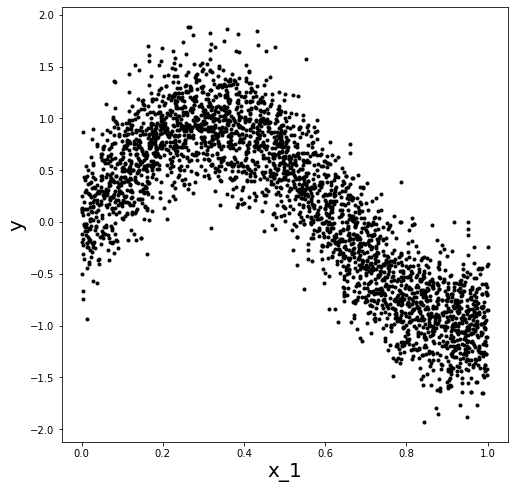

In [6]:
fn_plot_data(df_all)

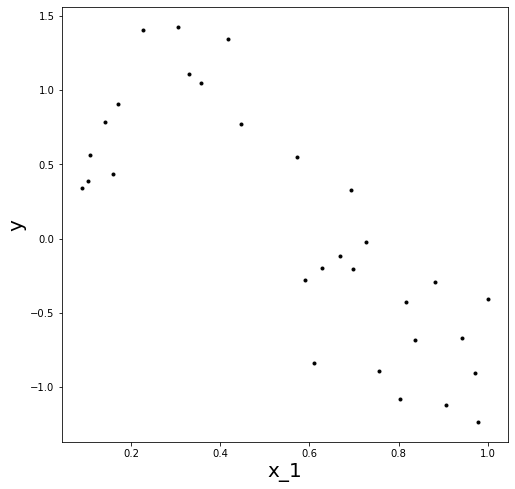

In [7]:
fn_plot_data(df_train)

*** Create features for polynomial regression ***
- i.e. feature engineering, creating polynomial features

In [8]:
#creates an extra 15 columns, x^2, x^3, ..., x^16
for idx in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%idx      #new var will be x_power
    df_all[colname] = df_all['x_1']**idx
df_train = df_all.iloc[0:30]

In [9]:
print(df_all.iloc[:,0:5].head(30))

           y       x_1       x_2       x_3       x_4
0  -0.291049  0.882349  0.778540  0.686945  0.606125
1   0.385600  0.104328  0.010884  0.001136  0.000118
2  -1.118268  0.907009  0.822666  0.746166  0.676779
3   1.427374  0.306399  0.093880  0.028765  0.008814
4   0.774178  0.446409  0.199281  0.088961  0.039713
5  -0.281605  0.589985  0.348083  0.205364  0.121162
6  -0.680141  0.837111  0.700755  0.586610  0.491058
7  -0.207747  0.697801  0.486926  0.339777  0.237097
8  -1.077996  0.802803  0.644492  0.517400  0.415370
9   0.563427  0.107215  0.011495  0.001232  0.000132
10 -0.888967  0.757093  0.573189  0.433957  0.328546
11 -0.406221  0.999671  0.999342  0.999013  0.998685
12 -0.023052  0.725931  0.526976  0.382548  0.277704
13  0.788650  0.141448  0.020008  0.002830  0.000400
14  1.046093  0.356721  0.127250  0.045393  0.016192
15 -0.666160  0.942704  0.888691  0.837773  0.789772
16 -0.839878  0.610162  0.372298  0.227162  0.138605
17  1.405109  0.227577  0.051792  0.011787  0.

*** Function to fit a polynomial regression model ***
- note that <i>y = b_1*x + b_2*x^2 + b_3*x^3</i> is STILL A LINEAR model as the value of <i>y</i> depends on a LINEAR combination of <i>x, x^2,x^3</i>. 
- i.e. it just because variables are polynomials, does NOT mean the model is not linear

In [10]:
def fn_polynomial_regression(data,degree):
    
    model = LinearRegression()
    
    vars_x = ['x_1']
    if degree >=2:
        vars_x.extend(['x_%d'%i for i in range(2,degree+1)])
    
    data_toUse = data[vars_x].copy()
    #fit linear regression, using polynomial data
    
    model.fit(X=data_toUse, y=data['y'])
    return model


In [11]:
# fn_plot_predictions(df_train,y[0:30])

***Fit a degree-2 polynomial***

- Fit our degree-2 polynomial to the data generated above:
- \** note the size of the coefficients **

In [12]:
model = fn_polynomial_regression(df_train, degree=4)

Inspect learned parameters

In [13]:
# print(model.intercept_) #prints intercept
# print(model.coef_.flatten()) #prints coefficients
fn_print_coefficients(model)

Learned polynomial for degree 4:
-1.3294 + 22.4535x + -62.0806x^2 + 58.7185x^3 + -18.5472x^4


Form and plot our predictions along a grid of x values:

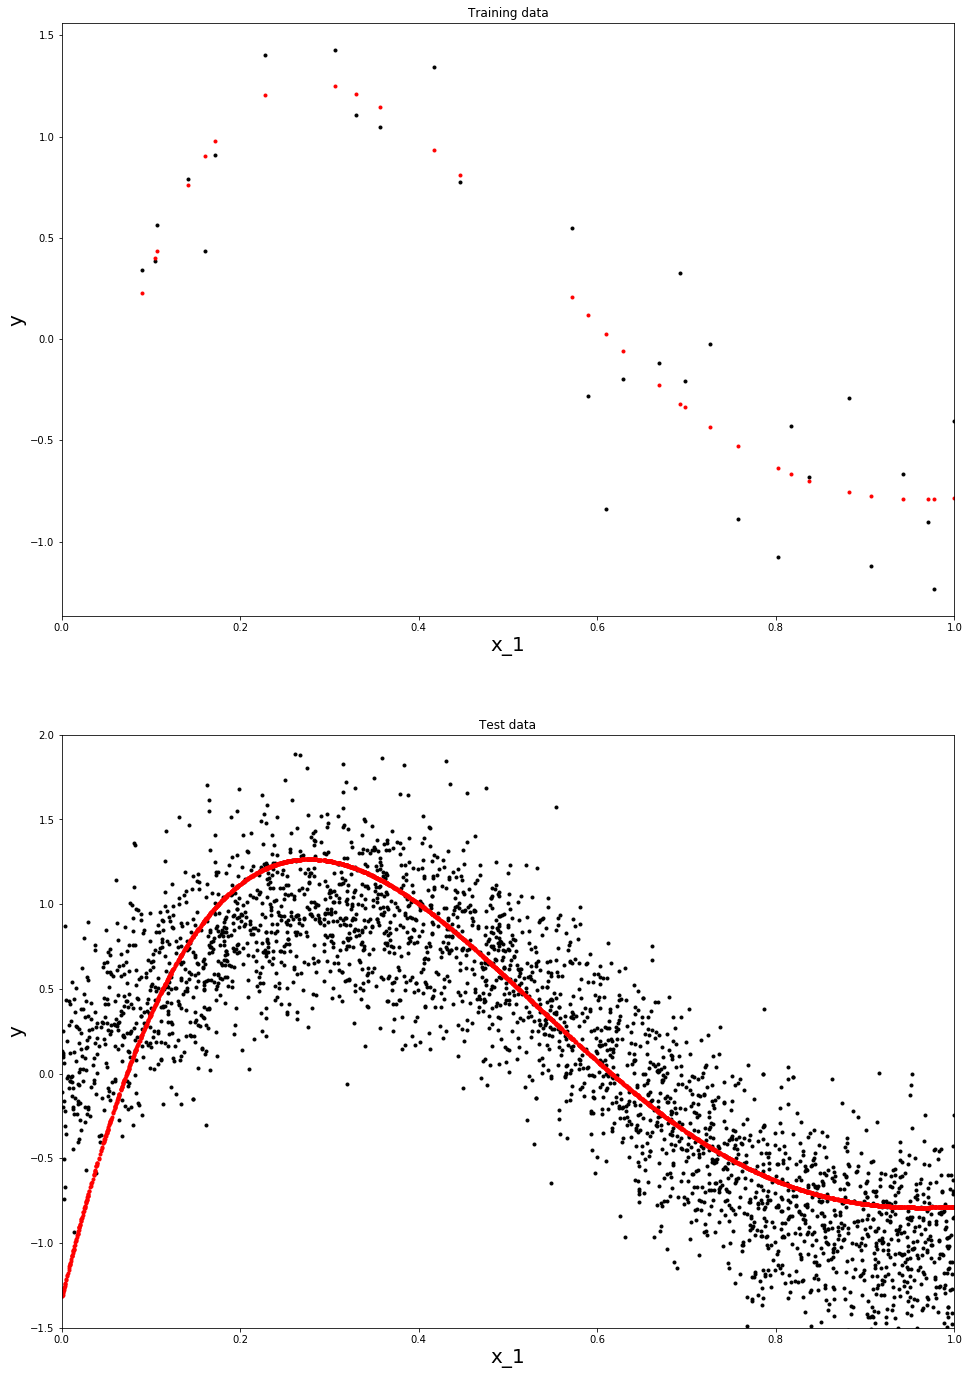

In [14]:
fn_plot_predictions(df_all,model)

***Fit a degree-15 polynomial***
- note the size of the coefficients!

Learned polynomial for degree 15:
-647.3169 + 33166.2940x + -748677.5608x^2 + 9888943.9313x^3 + -85579976.0320x^4 + 514887694.6884x^5 + -2229423629.1614x^6 + 7091580054.7366x^7 + -16754231355.2219x^8 + 29486475813.5296x^9 + -38458212681.3873x^10 + 36613425295.5962x^11 + -24699093878.4105x^12 + 11175322645.4802x^13 + -3039951093.9668x^14 + 375628324.4223x^15


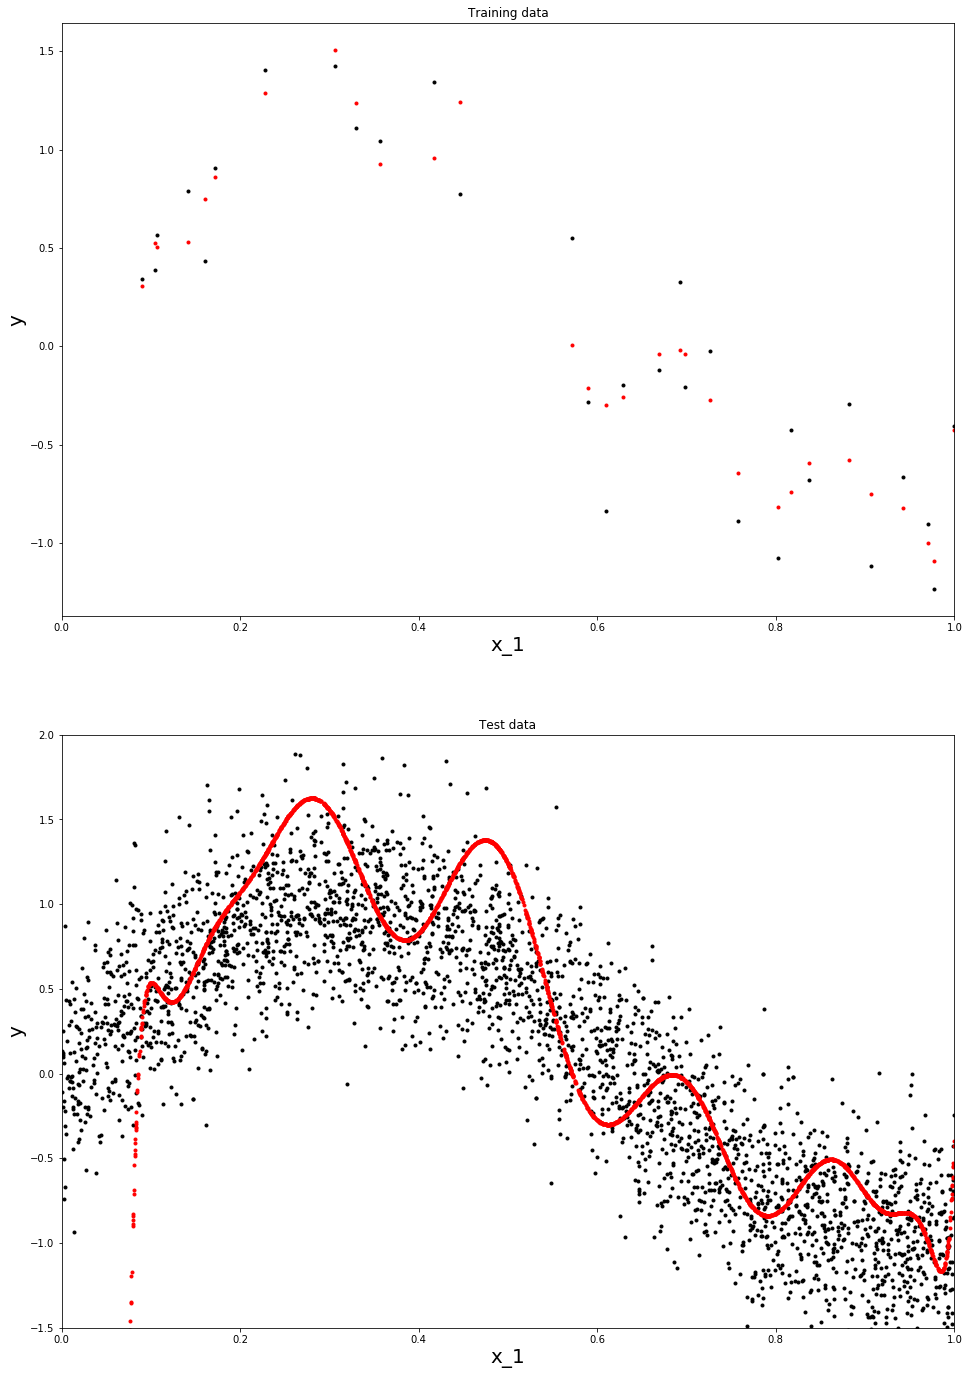

In [15]:
model = fn_polynomial_regression(df_train, degree=15)
fn_print_coefficients(model)
fn_plot_predictions(df_all, model)

In [20]:
model.rank_

15

In [25]:
model.coef_

array([ 3.31662940e+04, -7.48677561e+05,  9.88894393e+06, -8.55799760e+07,
        5.14887695e+08, -2.22942363e+09,  7.09158005e+09, -1.67542314e+10,
        2.94864758e+10, -3.84582127e+10,  3.66134253e+10, -2.46990939e+10,
        1.11753226e+10, -3.03995109e+09,  3.75628324e+08])